In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
%matplotlib inline

In [65]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [110]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
# Remember to adjust the threshold (in this case, < 20) based on your dataset's specific characteristics and domain knowledge.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

""
0
1
2
3
4
...
2443646
2443647
2443648
2443649


In [111]:
# Extracting columns with object (typically string) data types to create a categorical dataframe
# For demonstration purposes, let's consider the columns in potential_categorical_from_numerical as categorical variables.
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

# Adjusting the numerical dataframe by removing the moved columns
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

Part 1: Analyzing Best-Seller Trends Across Product Categories

Objective: Understand the relationship between product categories and their best-seller status.

    Crosstab Analysis:

        Create a crosstab between the product category and the isBestSeller status.

        Are there categories where being a best-seller is more prevalent?

        Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.


In [66]:
# Part 1
# 1. Create a crosstab between the product category and the isBestSeller status.

# drop uid column
# df.drop('uid',inplace=True, axis=1)

# create the cross tab
crosstab_bestsell_cat = pd.crosstab(df['isBestSeller'],df['category'],)

crosstab_bestsell_cat

category,3D Printers,3D Printing & Scanning,Abrasive & Finishing Products,Action Cameras,Adapters,Agricultural Equipment & Supplies,Alexa Built-In Devices,Art & Craft Supplies,Arts & Crafts,Baby,...,Uninterruptible Power Supply Units & Accessories,Vacuums & Floorcare,Vases,"Water Coolers, Filters & Cartridges",Wearable Technology,Wind Instruments,Window Treatments,Women,Women's Sports & Outdoor Shoes,eBook Readers & Accessories
isBestSeller,,,,,,,,,,,,,,,,,,,,,
False,247,4065,245,1696,251,8421,106,253,9319,14709,...,3652,6919,250,186,8876,243,234,17559,1939,246
True,1,2,5,1,3,109,1,5,230,341,...,1,26,0,1,30,7,5,213,20,0


In [67]:
# 2. Chi-square
chi2_stats, chi2_p_value,_,_=chi2_contingency(crosstab_bestsell_cat)
chi2_stats,chi2_p_value

(36540.20270061387, 0.0)

In [68]:
# Cramer's V
association(crosstab_bestsell_cat,method="cramer")

0.1222829439760564

There is a weak association between best seller and the category variables

<Axes: xlabel='isBestSeller'>

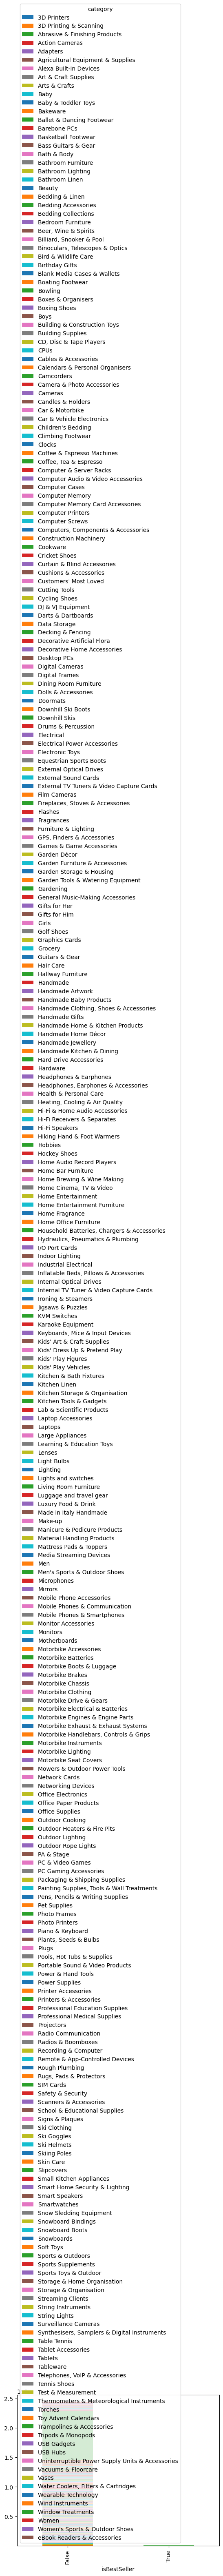

In [69]:
# 3.Visualization: Categorical Vs. Categorical
# Stacked Bar Chart
crosstab_bestsell_cat.plot(kind="bar",stacked=True)

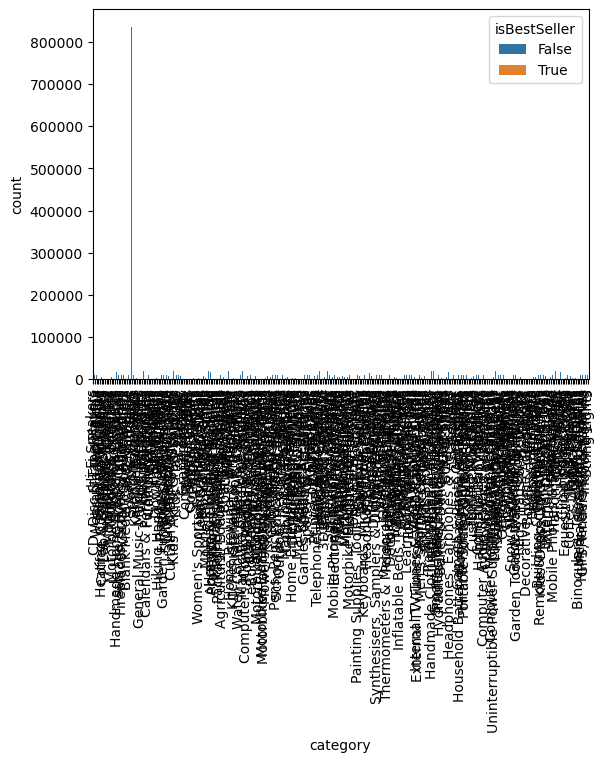

In [70]:
sns.countplot(data=df,x='category',hue='isBestSeller')
plt.xticks(rotation=90)
plt.show()

Part 2: Exploring Product Prices and Ratings Across Categories and Brands

Objective: Investigate how different product categories influence product prices.

    Preliminary Step: Remove outliers in product prices.

    For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

    Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

    Violin Plots:
        Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
        Which product category tends to have the highest median price? Don't filter here by top categories.


In [71]:
# Remove outliers in product prices.
# using Tukey's test to determine if values are outliers with the IQR

#     Calculate the first quartile (Q1) and third quartile (Q3) for the data.
#     Compute the interquartile range: ( \text{IQR} = Q3 - Q1 ).
#     Identify outliers:
#         Values less than ( Q1 - 1.5 \times \text{IQR} )
#         Values greater than ( Q3 + 1.5 \times \text{IQR} )

def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    removed_outliers = data[(data >= lower_bound) & (data <= upper_bound)]
    
    return removed_outliers

In [72]:
data_series = df['price']  # replace 'ColumnName' with your specific column
outliers_removed = tukeys_test_outliers(data_series)
print(outliers_removed)

0          21.99
1          23.99
2          21.99
3          31.99
4          17.99
           ...  
2443646    22.34
2443647    97.99
2443648    52.99
2443649    79.99
2443650    53.99
Name: price, Length: 2115963, dtype: float64


In [73]:
# Compute value counts of 'category' column and selecting top 20 categories based on counts
top_20_categories = df['category'].value_counts().head(20)
top_20_categories

Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Handmade Gifts                             18295
Handmade Home Décor                        18146
Luggage and travel gear                    18142
Handmade Jewellery                         18044
Handmade Artwork                           17878
Women                                      17772
Handmade Home & Kitchen Products           17435
Handmade Kitchen & Dining                  17432
Men                                        17417
Baby                                       15050
Name: category, dtyp

In [74]:
top_20_categories.index

Index(['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories',
       'Bath & Body', 'Birthday Gifts', 'Manicure & Pedicure Products',
       'Skin Care', 'Make-up', 'Hair Care', 'Fragrances', 'Handmade Gifts',
       'Handmade Home Décor', 'Luggage and travel gear', 'Handmade Jewellery',
       'Handmade Artwork', 'Women', 'Handmade Home & Kitchen Products',
       'Handmade Kitchen & Dining', 'Men', 'Baby'],
      dtype='object')

In [75]:
# Filter the DataFrame to include only rows with top 20 categories
top_20_df = df[df['category'].isin(top_20_categories.index)]
top_20_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


<Axes: xlabel='category', ylabel='price'>

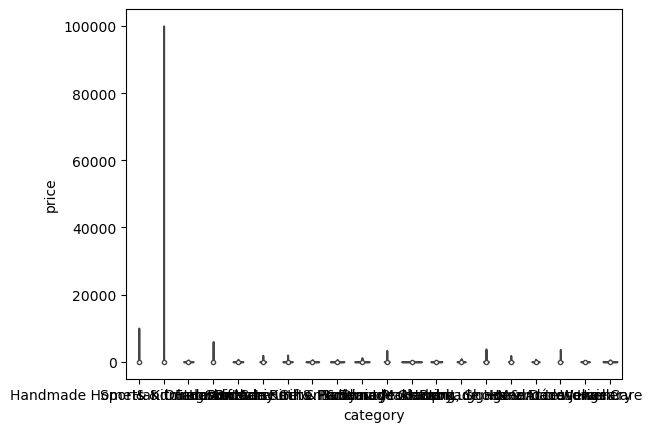

In [76]:
# violin plots of the top 20 categories
sns.violinplot(data=top_20_df,x='category',y='price')

In [ ]:


# Bar Charts:

#     Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
#     Which product category commands the highest average price? Don't filter here by top categories.


In [82]:
# find the top 10 categories based on price
top_10_categories = df['category'].value_counts().head(10)
top_10_categories

Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Name: category, dtype: int64

In [92]:
# create new filtered df with the top 10 categories
top_10_df = df[df['category'].isin(top_10_categories.index)]
top_10_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82165,89485,B08G2HBBB6,GoPro HERO9 - Waterproof Sports Camera with Fr...,4.5,5161,199.00,True,0,Sports & Outdoors
82166,89486,B09D15SFMQ,GoPro HERO10 Black - Waterproof Action Camera ...,4.4,2467,249.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


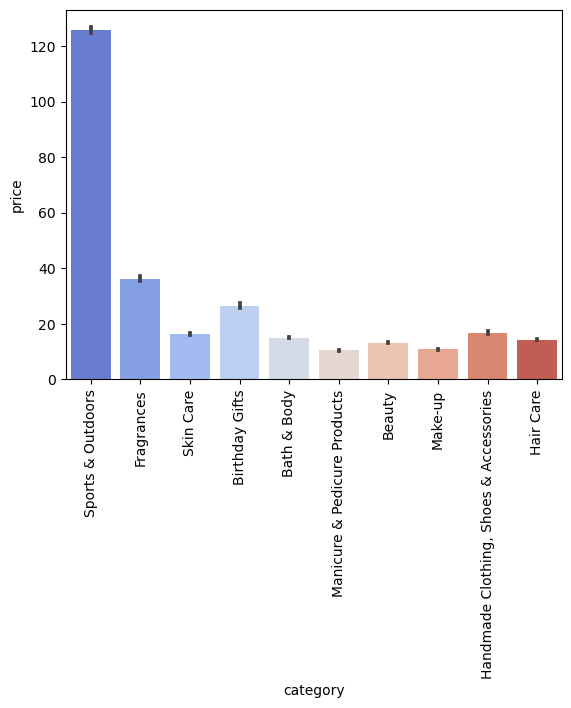

In [93]:
# create the bar chart for the top 10 categories and their price
sns.barplot(data=top_10_df,x='category',y='price',palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

In [94]:


# Box Plots:

#     Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
#     Which category tends to receive the highest median rating from customers? Don't filter here by top categories.



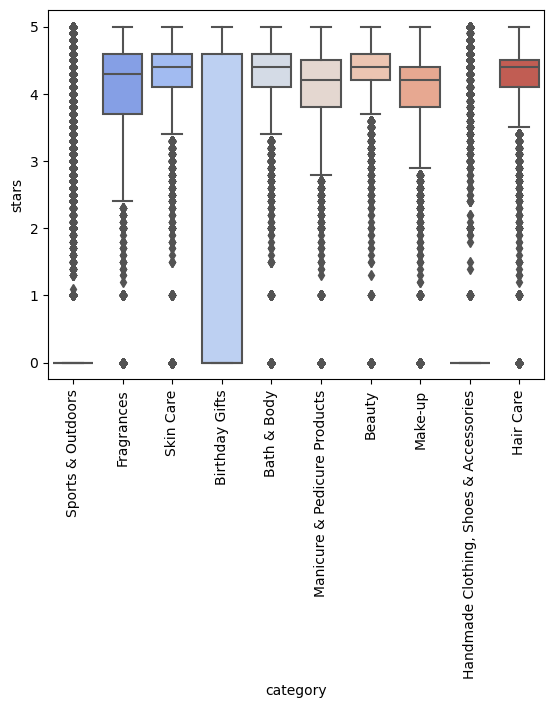

In [100]:
# using the top 10 filtered df from above to create the side by side box plot for categories and their ratings
sns.boxplot(data=top_10_df, x='category', y='stars', palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

Part 3: Investigating the Interplay Between Product Prices and Ratings

Objective: Analyze how product ratings (stars) correlate with product prices.

    Correlation Coefficients:
        Calculate the correlation coefficient between price and stars.
        Is there a significant correlation between product price and its rating?

    Visualizations:
        Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
        Use a correlation heatmap to visualize correlations between all numerical variables.
        Examine if product prices typically follow a normal distribution using a QQ plot.


In [101]:
# calculate the correlation coefficient between price and stars
# Pearson Correlation- Strength and direction
correlation = df['price'].corr(df['stars'])
correlation

-0.1249067326214861

In [102]:
# Spearmans Correlation
correlation = df['price'].corr(df['stars'],method='spearman')
correlation

-0.1331642546243379

There is a little no liner relationship between the price and the ratings of an item.

<Axes: xlabel='stars', ylabel='price'>

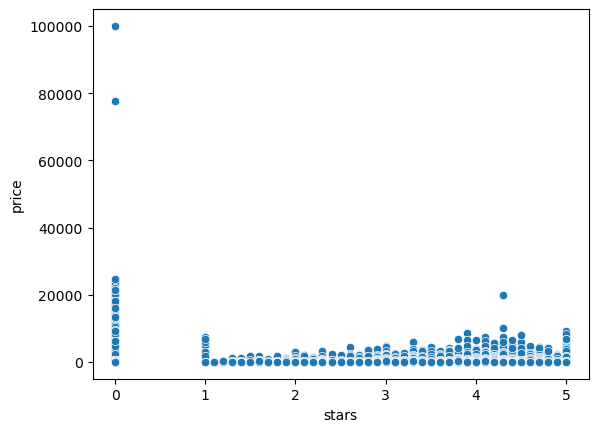

In [106]:
# scatter plot to visualize price and ratings
sns.scatterplot(data=df, x='stars', y='price')

In [ ]:
# Sorting the correlations for better visualization
spearman_correlations_sorted = spearman_correlations.sort_values(ascending=False)

# Displaying the correlations
spearman_correlations_sorted

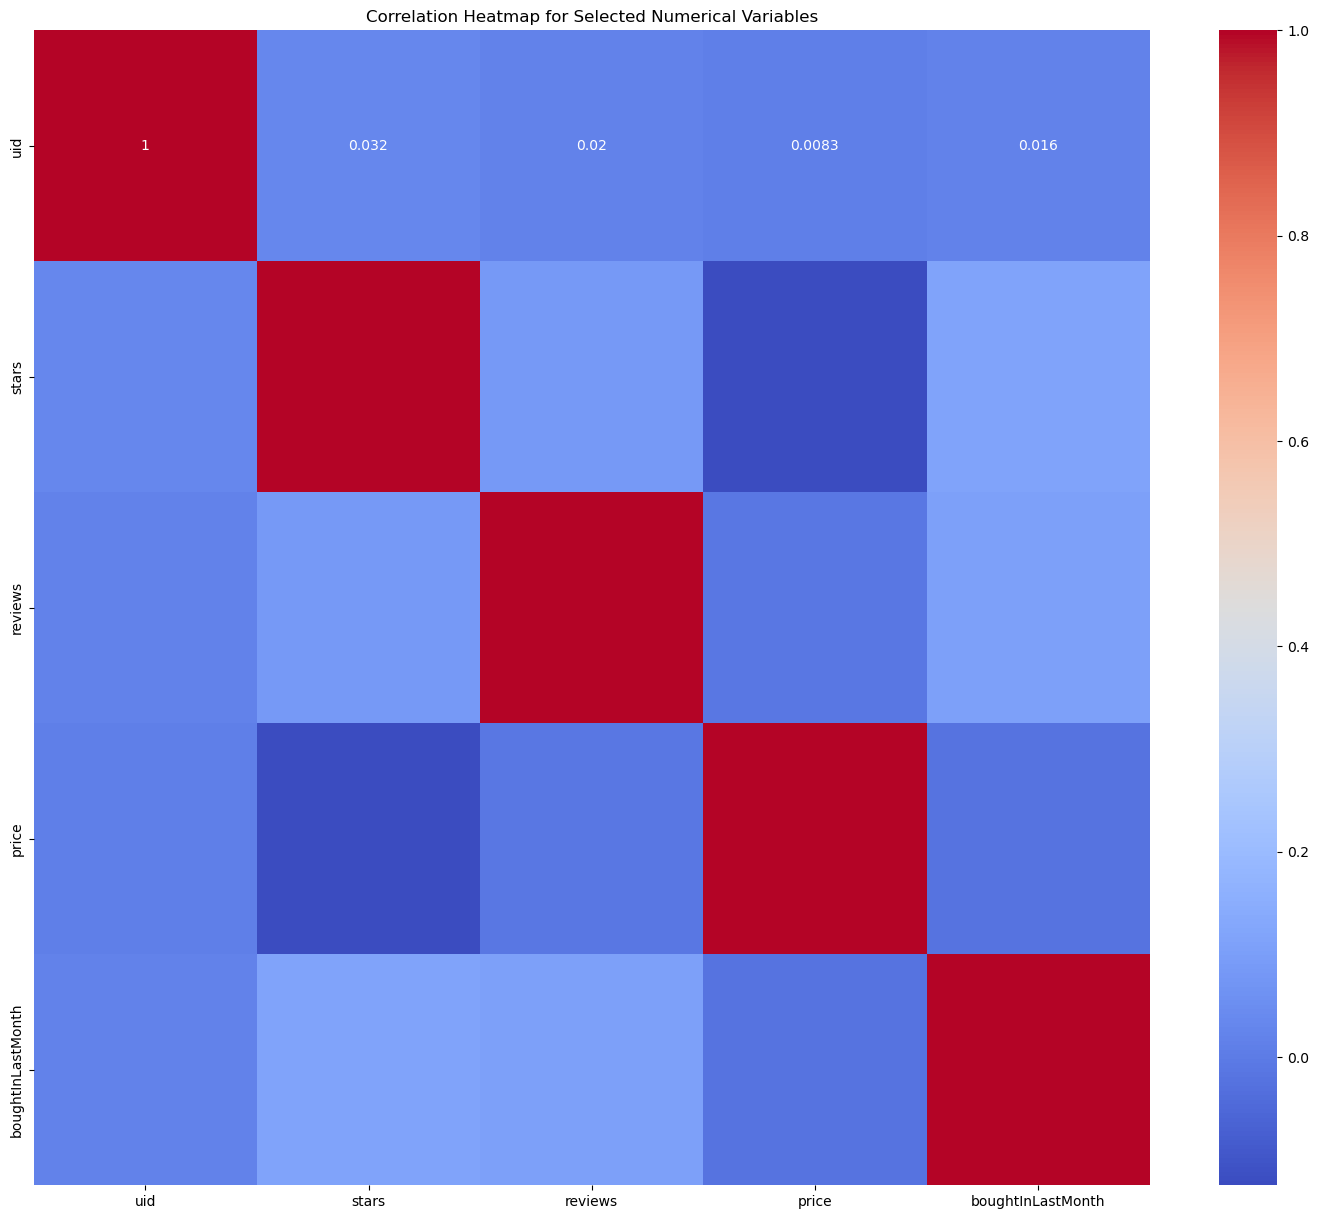

In [112]:
# correlation heatmap to visualize correlations between all numerical variables
correlation_matrix = df_numerical.corr()
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))
# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

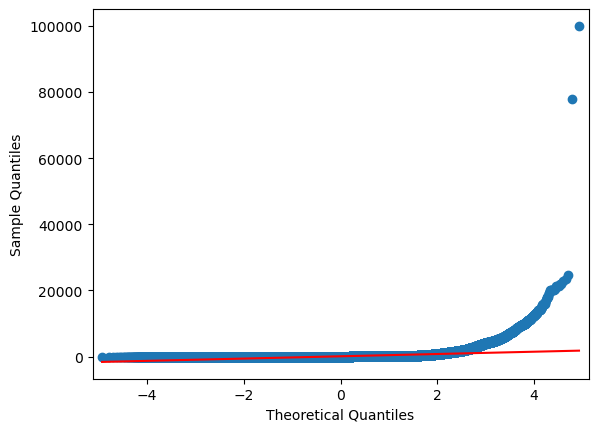

In [114]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');